In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Load npy file and print shape from path
data_path = "/home/geeling/Projects/ieeg_project/PopT-BYD-BTB/saved_examples/all_test_word_onset_wav/sub_1/trial001/1.npy"
data = np.load(data_path)
print(data.shape)

metadata_path = "/home/geeling/Projects/ieeg_project/PopT-BYD-BTB/saved_examples/all_test_word_onset_wav/subject_metadata/sub_1/localization/sub_1.csv"
metadata = np.loadtxt(metadata_path, delimiter=",", dtype=str)
print(metadata.shape)
print(metadata)

electrodesdata_path = "/home/geeling/Projects/ieeg_project/PopT-BYD-BTB/saved_examples/all_test_word_onset_wav/subject_metadata/sub_1/all_ordered_electrodes.json"
import json
with open(electrodesdata_path, 'r') as f:
    electrodes = json.load(f)
print(len(electrodes))
print(electrodes)

(91, 10240)
(92, 9)
[['Electrode' 'L' 'I' 'P' 'DesikanKilliany' 'Destrieux' 'DKT' 'ShiftDist'
  'ConfType']
 ['F3aOFa3' '113' '131' '72' 'ctx-rh-lateralorbitofrontal'
  'ctx_rh_S_orbital_med-olfact' 'ctx-rh-lateralorbitofrontal'
  '1.01694163097765' '0']
 ['F3aOFa8' '95' '126' '80' 'ctx-rh-lateralorbitofrontal'
  'ctx_rh_S_orbital-H_Shaped' 'ctx-rh-lateralorbitofrontal' '0.0' '0']
 ['F3aOFa9' '91' '125' '82' 'ctx-rh-lateralorbitofrontal'
  'ctx_rh_S_orbital-H_Shaped' 'ctx-rh-parsorbitalis' '0.0' '0']
 ['F3aOFa10' '88' '125' '84' 'ctx-rh-lateralorbitofrontal'
  'ctx_rh_S_orbital-H_Shaped' 'ctx-rh-parsorbitalis' '0.680741450263916'
  '0']
 ['F3aOFa11' '84' '123' '87' 'ctx-rh-parstriangularis'
  'ctx_rh_Lat_Fis-ant-Horizont' 'ctx-rh-parstriangularis'
  '1.64913329108768' '0']
 ['F3aOFa12' '82' '123' '88' 'ctx-rh-parstriangularis'
  'ctx_rh_Lat_Fis-ant-Horizont' 'ctx-rh-parstriangularis'
  '1.08682499528634' '0']
 ['F3aOFa13' '77' '122' '87' 'ctx-rh-parstriangularis'
  'ctx_rh_G_front_inf-

### Waveform

[-48.34635836 -43.62801542 -39.39517602 ...  -8.66072372  -7.26584265
  -4.95888406]


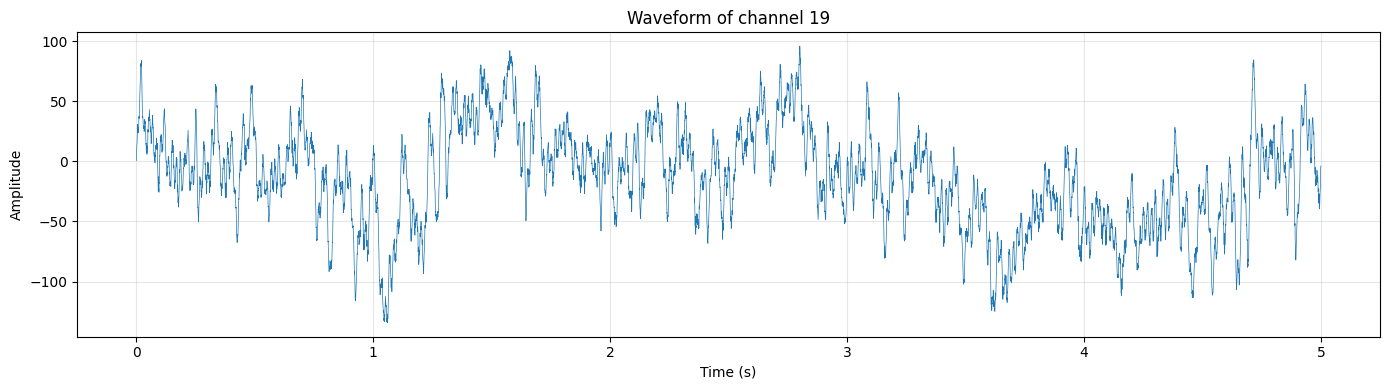

Recording duration: 5.00 seconds (0.08 minutes)
Total samples: 10240
Sampling rate: 2048 Hz


In [3]:
# plot the waveform from data (shape: channel, time)
fs = 2048  # sampling rate in Hz
channel_idx = 19

# Create time axis in seconds
time = np.arange(data.shape[1]) / fs
print(data[1])

plt.figure(figsize=(14, 4))
plt.plot(time, data[channel_idx], linewidth=0.5)
plt.title(f"Waveform of channel {channel_idx}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print some useful info
duration = len(data[channel_idx]) / fs
print(f"Recording duration: {duration:.2f} seconds ({duration/60:.2f} minutes)")
print(f"Total samples: {len(data[channel_idx])}")
print(f"Sampling rate: {fs} Hz")

### Fourier Transform

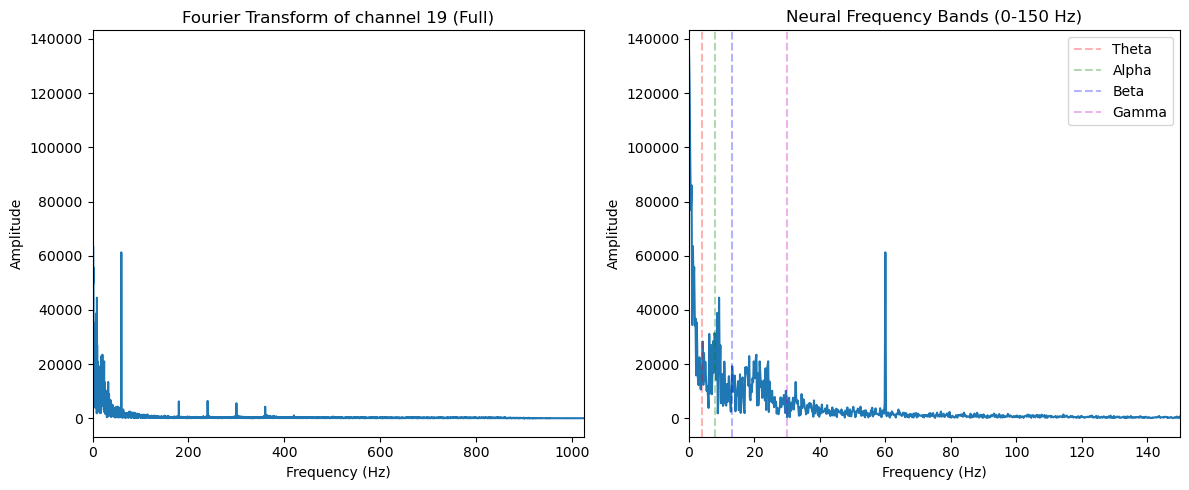

In [16]:
# Plot the Fourier transform with proper frequency axis
fs = 2048  # sampling rate in Hz
channel_idx = 19

fft_data = np.fft.fft(data[channel_idx])
freq = np.fft.fftfreq(len(fft_data), d=1/fs)  # d=1/fs converts to Hz

plt.figure(figsize=(12, 5))

# Plot 1: Full spectrum up to Nyquist
plt.subplot(1, 2, 1)
plt.plot(freq[:len(freq)//2], np.abs(fft_data[:len(fft_data)//2]))
plt.title(f"Fourier Transform of channel {channel_idx} (Full)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 1024)  # Up to Nyquist

# Plot 2: Zoom into neural frequency bands (0-150 Hz)
plt.subplot(1, 2, 2)
plt.plot(freq[:len(freq)//2], np.abs(fft_data[:len(fft_data)//2]))
plt.title("Neural Frequency Bands (0-150 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 150)
# Add vertical lines for common bands
plt.axvline(4, color='r', linestyle='--', alpha=0.3, label='Theta')
plt.axvline(8, color='g', linestyle='--', alpha=0.3, label='Alpha')
plt.axvline(13, color='b', linestyle='--', alpha=0.3, label='Beta')
plt.axvline(30, color='m', linestyle='--', alpha=0.3, label='Gamma')
plt.legend()
plt.tight_layout()
plt.show()

### Short-Time Fourier Transform

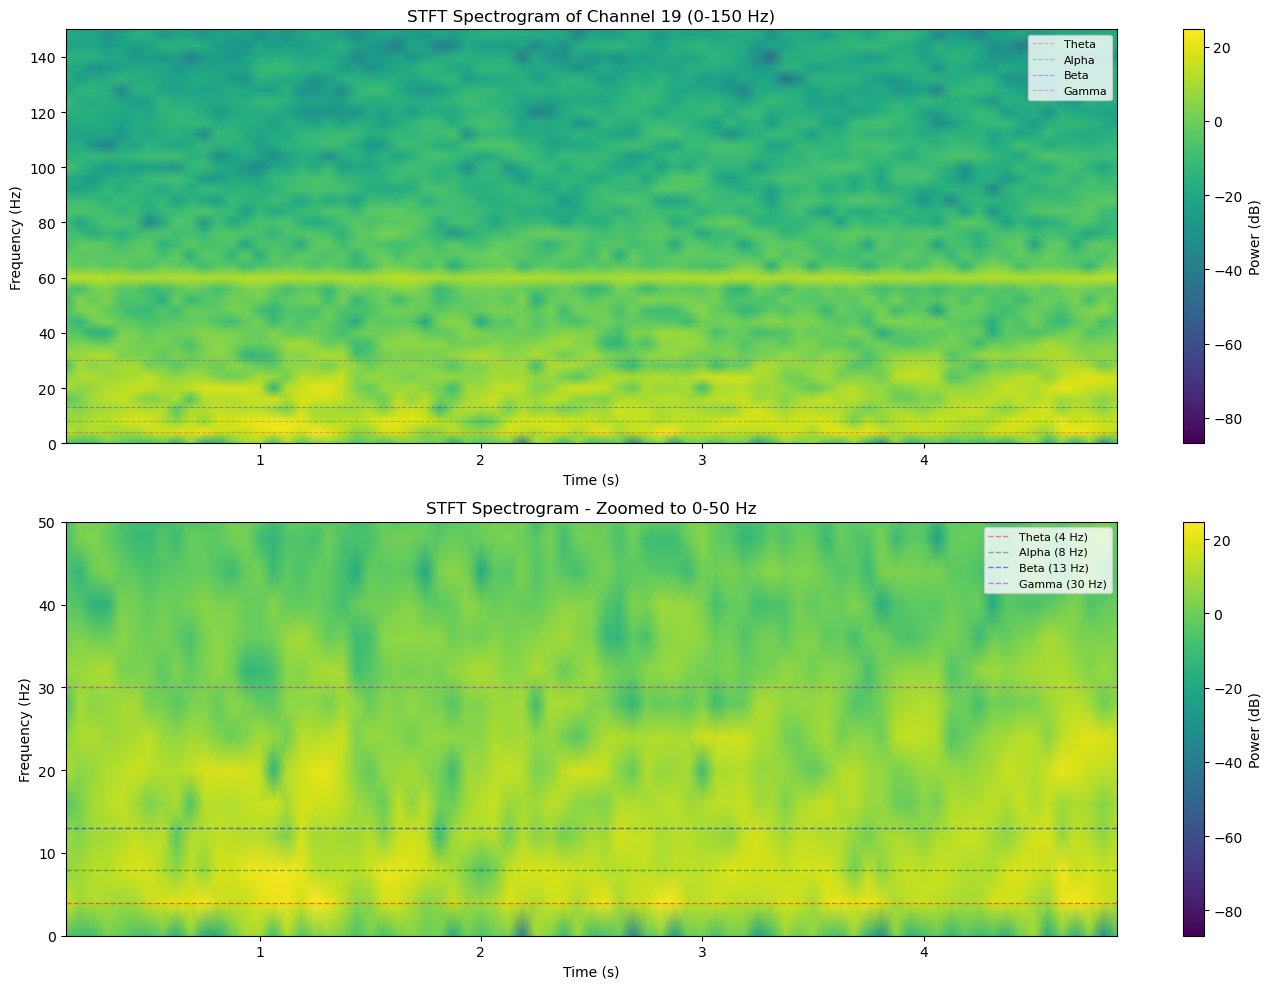

Time resolution: 0.062 seconds
Frequency resolution: 4.000 Hz
Window length: 0.250 seconds (512 samples)
Total duration: 4.88 seconds


In [20]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 2048  # sampling rate in Hz
channel_idx = 19

# Compute STFT/Spectrogram
# nperseg: length of each segment (window size)
# noverlap: number of points to overlap between segments
# Common choice: noverlap = nperseg // 2 or 3*nperseg // 4
f, t, Sxx = signal.spectrogram(data[channel_idx], 
                                fs=fs, 
                                nperseg=512,      # Window size: 512 samples = 0.25 seconds
                                noverlap=384)     # 75% overlap for smooth visualization

# Create figure with two subplots
plt.figure(figsize=(14, 10))

# Subplot 1: Full frequency range (0-150 Hz)
plt.subplot(2, 1, 1)
plt.pcolormesh(t, f, 10*np.log10(Sxx + 1e-10), shading='gouraud', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title(f'STFT Spectrogram of Channel {channel_idx} (0-150 Hz)')
plt.ylim(0, 150)
plt.colorbar(label='Power (dB)')

# Add frequency band markers
plt.axhline(4, color='r', linestyle='--', alpha=0.3, linewidth=0.8, label='Theta')
plt.axhline(8, color='g', linestyle='--', alpha=0.3, linewidth=0.8, label='Alpha')
plt.axhline(13, color='b', linestyle='--', alpha=0.3, linewidth=0.8, label='Beta')
plt.axhline(30, color='m', linestyle='--', alpha=0.3, linewidth=0.8, label='Gamma')
plt.legend(loc='upper right', fontsize=8)

# Subplot 2: Zoomed to low frequencies (0-50 Hz) for better detail
plt.subplot(2, 1, 2)
plt.pcolormesh(t, f, 10*np.log10(Sxx + 1e-10), shading='gouraud', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title(f'STFT Spectrogram - Zoomed to 0-50 Hz')
plt.ylim(0, 50)
plt.colorbar(label='Power (dB)')

# Add frequency band markers for zoomed view
plt.axhline(4, color='r', linestyle='--', alpha=0.5, linewidth=1, label='Theta (4 Hz)')
plt.axhline(8, color='g', linestyle='--', alpha=0.5, linewidth=1, label='Alpha (8 Hz)')
plt.axhline(13, color='b', linestyle='--', alpha=0.5, linewidth=1, label='Beta (13 Hz)')
plt.axhline(30, color='m', linestyle='--', alpha=0.5, linewidth=1, label='Gamma (30 Hz)')
plt.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

# Print information about the spectrogram
print(f"Time resolution: {t[1]-t[0]:.3f} seconds")
print(f"Frequency resolution: {f[1]-f[0]:.3f} Hz")
print(f"Window length: {512/fs:.3f} seconds ({512} samples)")
print(f"Total duration: {t[-1]:.2f} seconds")